In [131]:
import pandas as pd
import seaborn as sns
import numpy as np
import notebook_toolkit as nt
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
import seaborn as sns
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split
sns.set_style('darkgrid')
%matplotlib inline
nt.set_environment()
%run variables.py
raw_df = pd.read_csv("analytic_data2019.csv")
from itertools import combinations, product
from sklearn.model_selection import KFold,cross_val_predict,cross_val_score, cross_validate
from sklearn.linear_model import LinearRegression,Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import scipy.stats as stats
from sklearn.preprocessing import PolynomialFeatures


In [31]:
working_df = nt.drop_column_keyword_search(raw_df, keywords)

In [32]:
ten_percent_missing_values_columns = nt.column_null_percentage(working_df)
working_df = working_df.drop(columns = ten_percent_missing_values_columns.index)
working_df = working_df.drop(0)

In [33]:
string_datatype_df = working_df.iloc[:, 0:4]
float_datatype_df = working_df.iloc[:, 5:].astype(float)
working_df = pd.concat([string_datatype_df, float_datatype_df], axis = 1)

In [34]:
non_county_df = working_df[working_df[ranked].isnull()]
non_county_df.reset_index(inplace = True)
del non_county_df["index"], non_county_df[ranked]

In [35]:
county_level_df = working_df[working_df[ranked].notnull()]
county_level_df.reset_index(inplace = True)
del county_level_df["index"], county_level_df[ranked]

In [36]:
county_level_df = county_level_df.fillna(county_level_df.median())

In [37]:
non_county_df[free_lunch] = non_county_df[free_lunch].fillna(non_county_df[free_lunch].median())

In [38]:
del non_county_df[housing_costs], non_county_df[overcrowding]
del non_county_df[facilities], non_county_df[release_year]

In [39]:
non_county_df.iloc[2,35] = non_county_df.iloc[:,35].median()
non_county_df.iloc[12,35] = non_county_df.iloc[:,35].median()
non_county_df.iloc[12,36] = non_county_df.iloc[:,36].median()
non_county_df = non_county_df.fillna(non_county_df.mean())

In [40]:
national_level_df = non_county_df.iloc[0]
state_level_df = non_county_df.iloc[1:,:]

In [41]:
eda_df = county_level_df.copy()
eda_df = eda_df.drop(columns = ['Drinking water violations raw value', '% Asian raw value'])

In [42]:
to_drop = nt.multicolinear_drop(eda_df)

In [43]:
eda_df = eda_df.drop(eda_df[to_drop], axis =1)

In [44]:
clean_df = eda_df[features]

In [45]:
x_df = clean_df.drop(columns = ['Teen births raw value',
                                'State FIPS Code', 
                                'County FIPS Code', 
                                '5-digit FIPS Code',
                                'State Abbreviation'])

In [46]:
outcome = clean_df['Teen births raw value']
features = nt.norm_feat(x_df)

In [47]:
lm=LinearRegression()
lm.fit(features,outcome)
# Applying 5 folds on the training set and performing cross validation
Kfold = KFold(5)
baseline=np.mean(cross_val_score(lm,features,outcome,cv=Kfold))
# R-squared value from baseline model
print(baseline)

0.6496664100366882


In [48]:
regression = LinearRegression()

crossvalidation = KFold(n_splits=7, shuffle=True, random_state=42)
baseline_model = cross_validate(
    regression, X_train, y_train, scoring='r2', cv=crossvalidation, return_train_score = True)
baseline_model

{'fit_time': array([0.00910115, 0.00590396, 0.00548124, 0.00665808, 0.00764012,
        0.00855112, 0.0059588 ]),
 'score_time': array([0.00208688, 0.00228119, 0.00261569, 0.002455  , 0.00177503,
        0.00306106, 0.00162625]),
 'test_score': array([0.72107213, 0.69536791, 0.68806029, 0.70193445, 0.67423073,
        0.67193644, 0.72748381]),
 'train_score': array([0.70406272, 0.70870081, 0.71022608, 0.70750775, 0.71138014,
        0.71157544, 0.70349478])}

In [49]:
# check p-values whether the model can be imporved
from statsmodels.formula.api import ols
import statsmodels.api as sm
import statsmodels.formula.api as smf
                
x = sm.add_constant(X_train)
model = sm.OLS(y_train, x)
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Teen births raw value   R-squared:                       0.707
Model:                               OLS   Adj. R-squared:                  0.705
Method:                    Least Squares   F-statistic:                     250.7
Date:                   Wed, 26 Feb 2020   Prob (F-statistic):               0.00
Time:                           06:25:51   Log-Likelihood:                -8800.0
No. Observations:                   2513   AIC:                         1.765e+04
Df Residuals:                       2488   BIC:                         1.780e+04
Df Model:                             24                                         
Covariance Type:               nonrobust                                         
========================================================================================================================================
                                                                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------------
const                                                                   53.7497      5.783      9.295      0.000      42.410      65.090
Poor or fair health raw value                                          139.6183      8.527     16.373      0.000     122.897     156.339
Low birthweight raw value                                               62.3805     11.683      5.339      0.000      39.471      85.290
Food environment index raw value                                        -0.0187      0.209     -0.090      0.929      -0.429       0.391
Access to exercise opportunities raw value                               2.0971      1.005      2.086      0.037       0.126       4.068
Excessive drinking raw value                                           -38.9848      7.694     -5.067      0.000     -54.072     -23.898
Sexually transmitted infections raw value                                0.0047      0.001      4.848      0.000       0.003       0.007
Ratio of population to primary care physicians.                         -0.0001   7.93e-05     -1.518      0.129      -0.000    3.51e-05
Ratio of population to mental health providers.                         -0.0001   7.43e-05     -1.636      0.102      -0.000    2.42e-05
High school graduation raw value                                        -3.3136      2.632     -1.259      0.208      -8.474       1.847
Some college raw value                                                 -31.3963      2.334    -13.450      0.000     -35.974     -26.819
Unemployment raw value                                                  33.7419     13.013      2.593      0.010       8.224      59.260
Income inequality raw value                                              0.2573      0.292      0.881      0.379      -0.316       0.830
Children in single-parent households raw value                          11.7266      2.541      4.615      0.000       6.744      16.710
Violent crime raw value                                                  0.0049      0.001      4.619      0.000       0.003       0.007
Severe housing problems raw value                                      -71.8006      6.333    -11.338      0.000     -84.218     -59.383
Percentage of households with overcrowding                             110.7567     12.748      8.688      0.000      85.759     135.754
Percentage of households with lack of kitchen or plumbing facilities    -7.5928     13.605     -0.558      0.577     -34.270      19.085
Insufficient sleep raw value                                           -53.2070      6.387     -8.330      0.000     -65.732     -40.682
Ratio of population to primary care 

In [50]:
# assessing whether Interactions add value
from itertools import combinations
combinations = list(combinations(X_train.columns, 2))
interactions = list()
baseline = baseline_model["train_score"].mean()
data = X_train.copy()

for comb in combinations:
    data["interaction"] = data[comb[0]] * data[comb[1]]
    score = np.mean(cross_val_score(regression, data, y_train, scoring="r2", cv=crossvalidation))
    if score > baseline: 
        interactions.append(comb[0], comb[1], round(score, 3))
print("Top 10 interactions: %s" %sorted(interactions, key=lambda inter: inter[2], reverse=True)[:10])

#Why isn't this working?

Top 10 interactions: []


In [51]:
for index, degree in enumerate([2, 3, 4]):
    
    # Instantiate PolynomialFeatures
    poly = PolynomialFeatures(degree)
    
    # Fit and transform X_train
    X_poly_train = poly.fit_transform(X_train)
    
    # Instantiate and fit a linear regression model to the polynomial transformed train features
    reg_poly = LinearRegression().fit(X_poly_train, y_train)
    
    # Evaluate model performance on test data
    print("degree %d" % degree, reg_poly.score(X_poly_train, y_train))

degree 2 0.8091951088781403
degree 3 0.7198118182126865
degree 4 0.2751188441380683


In [52]:
for index, degree in enumerate([2, 3, 4]):
    
    # Instantiate PolynomialFeatures
    poly = PolynomialFeatures(degree)
    
    # Fit and transform X_train
    X_poly_train = poly.fit_transform(X_train)
    
    # Instantiate and fit a linear regression model to the polynomial transformed train features
    reg_poly = cross_validate(
    regression, X_poly_train, y_train, scoring='r2', cv=crossvalidation, return_train_score = True)
    
    # Evaluate model performance on test data
    print("degree %d" % degree, reg_poly)

degree 2 {'fit_time': array([0.10222411, 0.0779109 , 0.08024597, 0.07876492, 0.07972574,
       0.07900906, 0.07501316]), 'score_time': array([0.00159001, 0.00084019, 0.00135779, 0.0010879 , 0.00124621,
       0.0013268 , 0.00085878]), 'test_score': array([0.46970847, 0.56266516, 0.68470974, 0.63288226, 0.61056901,
       0.63441442, 0.32711847]), 'train_score': array([0.82014658, 0.81445557, 0.82068915, 0.80841744, 0.81651606,
       0.8122286 , 0.60302268])}
degree 3 {'fit_time': array([8.88494086, 7.73671508, 7.85745907, 8.29048014, 7.17682695,
       7.45637321, 7.45553017]), 'score_time': array([0.00201011, 0.00200582, 0.00204992, 0.00212097, 0.0023911 ,
       0.00208783, 0.00206208]), 'test_score': array([-3.11469216e+00,  3.32509940e-01, -1.30078291e+02, -4.04073089e+00,
       -9.16428546e+01, -1.13140957e-01, -3.52414619e+00]), 'train_score': array([0.76055947, 0.72759171, 0.77898625, 0.72585694, 0.75298626,
       0.73593393, 0.74198304])}
degree 4 {'fit_time': array([16.640

In [56]:
y_df = clean_df['Teen births raw value']

#we have y_df as the target variable and x_df as the predictors (unnormalised)

In [57]:
# splitting the dataset into training and testing

X_train, X_test, y_train, y_test = train_test_split(x_df, y_df, test_size=0.20, random_state=42)

In [58]:
#build a naive model baseline using unscaled linear regression

crossvalidation = KFold(n_splits=5, shuffle=True, random_state=42)
baseline_model_naive = cross_validate(
    regression, X_train, y_train, scoring='r2', cv=crossvalidation, return_train_score = True)
baseline_model_naive

{'fit_time': array([0.00433898, 0.00792098, 0.00908709, 0.00584292, 0.00540113]),
 'score_time': array([0.001369  , 0.00268006, 0.00240588, 0.00182295, 0.00135207]),
 'test_score': array([0.7013497 , 0.69833938, 0.70811475, 0.6555438 , 0.71340373]),
 'train_score': array([0.70638896, 0.70899493, 0.70637842, 0.71553267, 0.70512287])}

In [59]:
#Normalise all data

ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

In [60]:
# Build a linear regression using scaled data 
linreg_scaled = LinearRegression()
linreg_scaled.fit(X_train_scaled, y_train)

baseline_model_scaled = cross_validate(
    linreg_scaled, X_train_scaled, y_train, scoring='r2', cv=crossvalidation, return_train_score = True)

baseline_model_scaled

#no difference in values between baseline_model_naive and baseline_scaled

{'fit_time': array([0.00326872, 0.00414824, 0.00539184, 0.00378919, 0.00420904]),
 'score_time': array([0.00107718, 0.00118685, 0.00117707, 0.00115585, 0.00106287]),
 'test_score': array([0.7013497 , 0.69833938, 0.70811475, 0.6555438 , 0.71340373]),
 'train_score': array([0.70638896, 0.70899493, 0.70637842, 0.71553267, 0.70512287])}

In [61]:
#build a 2nd order polynomial regression dataset for predictors

poly = PolynomialFeatures(2)
X_train_poly = pd.DataFrame(poly.fit_transform(X_train))
X_test_poly = pd.DataFrame(poly.fit_transform(X_test))

In [62]:
#build a linear regression using polynomial data (unscaled)

linreg_poly = LinearRegression()
linreg_poly.fit(X_train_poly, y_train)

baseline_model_poly = cross_validate(
    linreg_poly, X_train_poly, y_train, scoring='r2', cv=crossvalidation, return_train_score = True)

baseline_model_poly

#massively over fitting


{'fit_time': array([0.06583118, 0.05786276, 0.08754301, 0.08506179, 0.07881784]),
 'score_time': array([0.00222588, 0.00219011, 0.00333714, 0.00216317, 0.00560403]),
 'test_score': array([0.36840132, 0.59466626, 0.65290234, 0.66064205, 0.67957219]),
 'train_score': array([0.82618619, 0.82564044, 0.79757733, 0.81831148, 0.81548958])}

In [63]:
#Normalise all polynomial data
ss = StandardScaler()
X_train_poly_scaled = ss.fit_transform(X_train_poly)
X_test_poly_scaled = ss.transform(X_test_poly)

In [109]:
lasso_poly_train = []
lasso_poly_test = []
alphas = []

for alpha in range(0,10):

    lasso = Lasso(alpha) 
    lasso.fit(X_train_poly, y_train)

    lasso_model_poly = cross_validate(
    lasso, X_train_poly, y_train, scoring='r2', cv=crossvalidation, return_train_score = True)

    print(f"Lasso alpha = {lasso.alpha}")
    alphas.append(alpha)
    print()
    print(f'Lasso train score = {round(lasso_model_poly["train_score"].mean(),3)}')
    lasso_poly_train.append(round(lasso_model_poly["train_score"].mean(),3))
    print()
    print(f'Lasso test score = {round(lasso_model_poly["test_score"].mean(),3)}')
    lasso_poly_test.append(round(lasso_model_poly["test_score"].mean(),3))
    print()



Lasso alpha = 0

Lasso train score = 0.827

Lasso test score = 0.582

Lasso alpha = 1

Lasso train score = 0.732

Lasso test score = 0.46

Lasso alpha = 2

Lasso train score = 0.725

Lasso test score = 0.437

Lasso alpha = 3

Lasso train score = 0.72

Lasso test score = 0.425

Lasso alpha = 4

Lasso train score = 0.716

Lasso test score = 0.416

Lasso alpha = 5

Lasso train score = 0.713

Lasso test score = 0.409

Lasso alpha = 6

Lasso train score = 0.71

Lasso test score = 0.405

Lasso alpha = 7

Lasso train score = 0.708

Lasso test score = 0.398

Lasso alpha = 8

Lasso train score = 0.705

Lasso test score = 0.392

Lasso alpha = 9

Lasso train score = 0.702

Lasso test score = 0.386



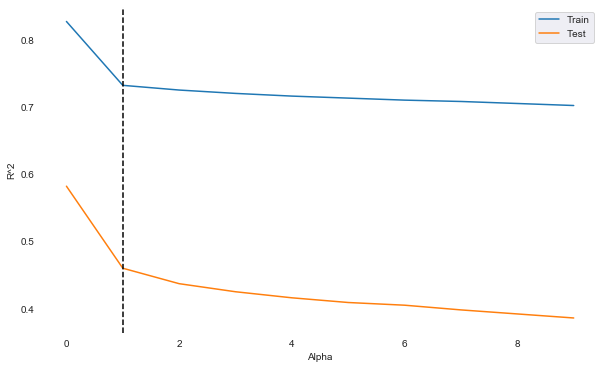

In [110]:
fig, ax = plt.subplots(figsize=(10,6))
optimal_alpha = 1

ax.plot(alphas, lasso_poly_train, label='Train')
ax.plot(alphas, lasso_poly_test, label='Test')
ax.set_xlabel('Alpha')
ax.set_ylabel('R^2')
ax = plt.gca()
ax.set_facecolor('xkcd:white')
ax.axvline(optimal_alpha, color='black', linestyle='--')
ax.legend();



In [113]:
lasso_poly_train_decimal = []
lasso_poly_test_decimal = []
alphas_decimal = []

for alpha in np.linspace(0, 1, num=11):

    lasso = Lasso(alpha) 
    lasso.fit(X_train_poly, y_train)

    lasso_model_poly = cross_validate(
    lasso, X_train_poly, y_train, scoring='r2', cv=crossvalidation, return_train_score = True)

    print(f"Lasso alpha = {lasso.alpha}")
    alphas_decimal.append(alpha)
    print()
    print(f'Lasso train score = {round(lasso_model_poly["train_score"].mean(),3)}')
    lasso_poly_train_decimal.append(round(lasso_model_poly["train_score"].mean(),3))
    print()
    print(f'Lasso test score = {round(lasso_model_poly["test_score"].mean(),3)}')
    lasso_poly_test_decimal.append(round(lasso_model_poly["test_score"].mean(),3))
    print()

Lasso alpha = 0.0

Lasso train score = 0.827

Lasso test score = 0.582

Lasso alpha = 0.1

Lasso train score = 0.768

Lasso test score = 0.65

Lasso alpha = 0.2

Lasso train score = 0.757

Lasso test score = 0.612

Lasso alpha = 0.30000000000000004

Lasso train score = 0.754

Lasso test score = 0.59

Lasso alpha = 0.4

Lasso train score = 0.75

Lasso test score = 0.568

Lasso alpha = 0.5

Lasso train score = 0.745

Lasso test score = 0.542

Lasso alpha = 0.6000000000000001

Lasso train score = 0.74

Lasso test score = 0.514

Lasso alpha = 0.7000000000000001

Lasso train score = 0.736

Lasso test score = 0.49

Lasso alpha = 0.8

Lasso train score = 0.734

Lasso test score = 0.478

Lasso alpha = 0.9

Lasso train score = 0.733

Lasso test score = 0.467

Lasso alpha = 1.0

Lasso train score = 0.732

Lasso test score = 0.46



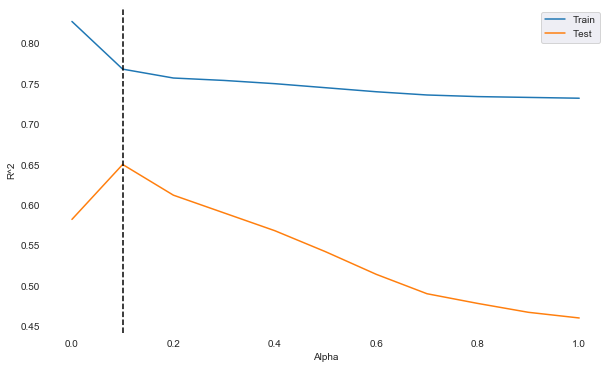

In [118]:
fig, ax = plt.subplots(figsize=(10,6))
optimal_alpha = 0.1
ax.plot(alphas_decimal, lasso_poly_train_decimal, label='Train')
ax.plot(alphas_decimal, lasso_poly_test_decimal, label='Test')
ax.set_xlabel('Alpha')
ax.set_ylabel('R^2')
ax = plt.gca()
ax.set_facecolor('xkcd:white')
ax.axvline(optimal_alpha, color='black', linestyle='--')
ax.legend();

In [120]:
ridge_poly_train = []
ridge_poly_test = []
alphas = []

for alpha in range(0,10):

    ridge = Ridge(alpha) 
    ridge.fit(X_train_poly, y_train)

    ridge_model_poly = cross_validate(
    ridge, X_train_poly, y_train, scoring='r2', cv=crossvalidation, return_train_score = True)

    print(f"Ridge alpha = {ridge.alpha}")
    alphas.append(alpha)
    print()
    print(f'Ridge train score = {round(ridge_model_poly["train_score"].mean(),3)}')
    ridge_poly_train.append(round(ridge_model_poly["train_score"].mean(),3))
    print()
    print(f'Ridge test score = {round(ridge_model_poly["test_score"].mean(),3)}')
    ridge_poly_test.append(round(ridge_model_poly["test_score"].mean(),3))
    print()


Ridge alpha = 0

Ridge train score = 0.814

Ridge test score = 0.412

Ridge alpha = 1

Ridge train score = 0.795

Ridge test score = 0.695

Ridge alpha = 2

Ridge train score = 0.793

Ridge test score = 0.694

Ridge alpha = 3

Ridge train score = 0.792

Ridge test score = 0.693

Ridge alpha = 4

Ridge train score = 0.791

Ridge test score = 0.692

Ridge alpha = 5

Ridge train score = 0.79

Ridge test score = 0.691

Ridge alpha = 6

Ridge train score = 0.789

Ridge test score = 0.69

Ridge alpha = 7

Ridge train score = 0.789

Ridge test score = 0.688

Ridge alpha = 8

Ridge train score = 0.788

Ridge test score = 0.687

Ridge alpha = 9

Ridge train score = 0.787

Ridge test score = 0.686



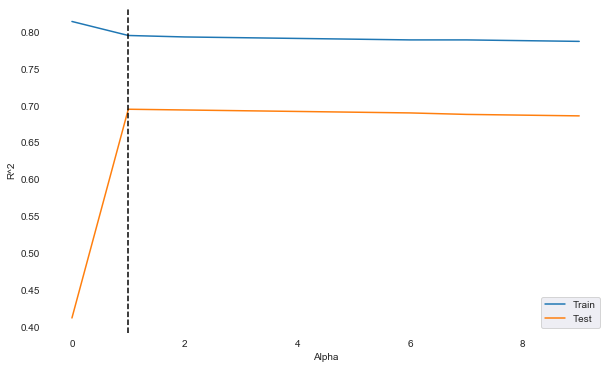

In [123]:
fig, ax = plt.subplots(figsize=(10,6))
optimal_alpha = 1
ax.plot(alphas, ridge_poly_train, label='Train')
ax.plot(alphas, ridge_poly_test, label='Test')
ax.set_xlabel('Alpha')
ax.set_ylabel('R^2')
ax = plt.gca()
ax.set_facecolor('xkcd:white')
ax.axvline(optimal_alpha, color='black', linestyle='--')
ax.legend();

In [128]:
ridge_poly_train_decimal = []
ridge_poly_test_decimal = []
alphas_decimal = []

for alpha in np.linspace(0, 1, num=11):

    ridge = Ridge(alpha) 
    lasso.fit(X_train_poly, y_train)

    ridge_model_poly = cross_validate(
    ridge, X_train_poly, y_train, scoring='r2', cv=crossvalidation, return_train_score = True)

    print(f"Ridge alpha = {ridge.alpha}")
    alphas_decimal.append(alpha)
    print()
    print(f'Ridge train score = {round(ridge_model_poly["train_score"].mean(),3)}')
    ridge_poly_train_decimal.append(round(ridge_model_poly["train_score"].mean(),3))
    print()
    print(f'Ridge test score = {round(ridge_model_poly["test_score"].mean(),3)}')
    ridge_poly_test_decimal.append(round(ridge_model_poly["test_score"].mean(),3))
    print()

Ridge alpha = 0.0

Ridge train score = 0.814

Ridge test score = 0.412

Ridge alpha = 0.1

Ridge train score = 0.804

Ridge test score = 0.683

Ridge alpha = 0.2

Ridge train score = 0.801

Ridge test score = 0.688

Ridge alpha = 0.30000000000000004

Ridge train score = 0.8

Ridge test score = 0.69

Ridge alpha = 0.4

Ridge train score = 0.799

Ridge test score = 0.692

Ridge alpha = 0.5

Ridge train score = 0.798

Ridge test score = 0.693

Ridge alpha = 0.6000000000000001

Ridge train score = 0.797

Ridge test score = 0.693

Ridge alpha = 0.7000000000000001

Ridge train score = 0.797

Ridge test score = 0.694

Ridge alpha = 0.8

Ridge train score = 0.796

Ridge test score = 0.694

Ridge alpha = 0.9

Ridge train score = 0.796

Ridge test score = 0.694

Ridge alpha = 1.0

Ridge train score = 0.795

Ridge test score = 0.695



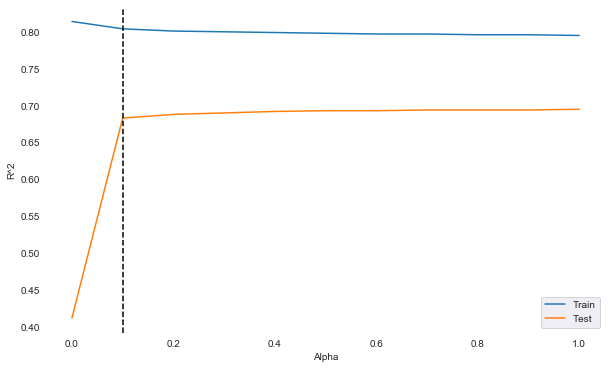

In [130]:
fig, ax = plt.subplots(figsize=(10,6))
optimal_alpha = 0.1
ax.plot(alphas_decimal, ridge_poly_train_decimal, label='Train')
ax.plot(alphas_decimal, ridge_poly_test_decimal, label='Test')
ax.set_xlabel('Alpha')
ax.set_ylabel('R^2')
ax = plt.gca()
ax.set_facecolor('xkcd:white')
ax.axvline(optimal_alpha, color='black', linestyle='--')
ax.legend();